# Visualizations and Random Forest 
Mark Deutsch
ABE 516X 
10/29/2019

Prior to this task, you should have watched a video on random forest on Canvas.

## Advantages of Random Forest:

* Random forest can solve both type of problems that is classification and regression and does a decent estimation at both fronts.
* Random forest can be used on both categorical and continuous variables. 
* You do not have to scale features.
* Fairly robust to missing data and outliars.

## Disadvantages of Random Forest

* It is complex, e.g., look at the tree at the end of this exercise!  This makes it feel like a black box, and we have very little control over what the model does.
* It can take a long time to train.

In [1]:
# Here are some alternative ways to load packages in python as aliases 
# This can be useful if you call them often
import numpy as np
import sklearn as sk
import sklearn.datasets as skd
import sklearn.ensemble as ske
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline


The Boston Housing Dataset consists of price of houses in various places in Boston. Alongside with price, the dataset also provide information such as Crime (CRIM), areas of non-retail business in the town (INDUS), the age of people who own the house (AGE), and there are many other attributes that available here.

In [2]:
data = skd.load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
df.shape

(506, 13)

In [4]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

We should check to see if there are any null values.  There are several ways we've learned to do this.

In [5]:
pd.isnull(df).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

We shoud check the data first to see if there are any weird anomalies. 

What we should look for are:
* There are not any data points that immediately appear as anomalous 
* No zeros in any of the measurement columns. 

Another method to verify the quality of the data is make basic plots. Often it is easier to spot anomalies in a graph than in numbers.

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


It is useful to know whether some pairs of attributes are correlated and how much. For many ML algorithms correlated features that are not independent should be treated with caution.  Here is a good [blog](https://towardsdatascience.com/data-correlation-can-make-or-break-your-machine-learning-project-82ee11039cc9) on explaining why.

To prevent this, there are methods for deriving features that are as uncorrelated as possible (CA, ICA, autoencoder, dimensionality reduction, manifold learning, etc.), which we'll learn about in coming classes.

We can explore coreelation with Pandas pretty easily...

In [7]:
corr = df.corr(method = "pearson")
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


### Let's explore/review some visualization approaches

A good way to look at correlations quickly is a visualization called a heatmap.  Let's take a look at correlations betewen features in our dataset.

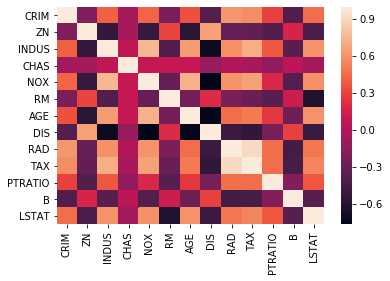

In [8]:
import seaborn as sns
sns.heatmap(corr)

You can also save the plots you make in these notebooks locally.

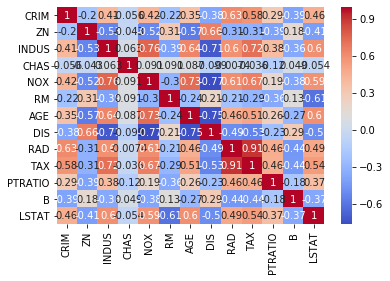

In [9]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.savefig('heatmap.png', tight_layout=True)

Let's take a look how we can explore the distributions of values within a specific feature.  Specifically, let's look at the distribution of property tax in Boston. We can do this either in matplotlib or sns.  There are so many tools available to you in Python!

(array([ 16.,   1.,   5.,  23.,   9.,  15.,   9.,  21.,  34.,  21.,  18.,
         65.,   3.,  16.,   6.,   8.,   3.,   2.,  11.,   8.,  44.,   2.,
          1.,  27.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 132.,   0.,   0.,   0.,   5.]),
 array([187.  , 197.48, 207.96, 218.44, 228.92, 239.4 , 249.88, 260.36,
        270.84, 281.32, 291.8 , 302.28, 312.76, 323.24, 333.72, 344.2 ,
        354.68, 365.16, 375.64, 386.12, 396.6 , 407.08, 417.56, 428.04,
        438.52, 449.  , 459.48, 469.96, 480.44, 490.92, 501.4 , 511.88,
        522.36, 532.84, 543.32, 553.8 , 564.28, 574.76, 585.24, 595.72,
        606.2 , 616.68, 627.16, 637.64, 648.12, 658.6 , 669.08, 679.56,
        690.04, 700.52, 711.  ]),
 <a list of 50 Patch objects>)

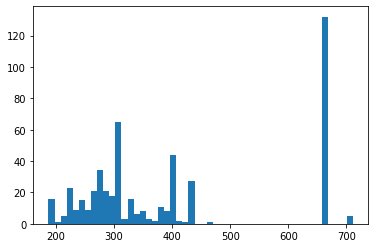

In [10]:
attr = df['TAX']
plt.hist(attr, bins=50)

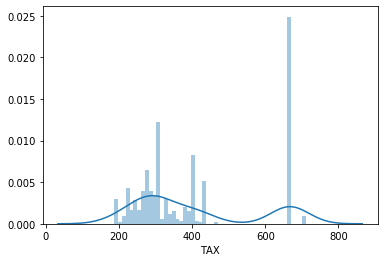

In [11]:
sns.distplot(attr,bins = 50)

What's the correlation between property taxes and the number of rooms in a house?

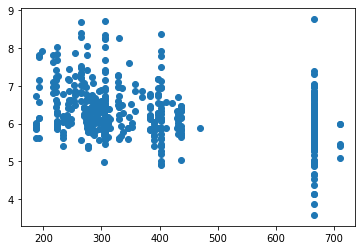

In [12]:
plt.scatter(df['TAX'],df['RM'])

Another possibility is to aggregate data points over 2D areas and estimate the [probability desnsity function](https://en.wikipedia.org/wiki/Probability_density_function). Its a 2D generalization of a histogram. We can either use a rectangular grid, or even a hexagonal one.

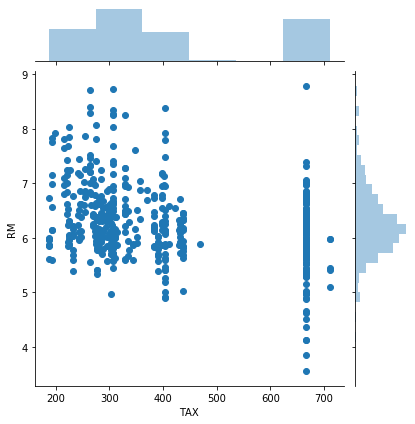

In [13]:
sns.jointplot(df['TAX'],df['RM'],kind = 'scatter')

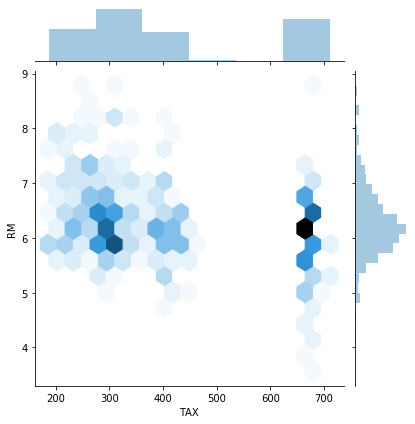

In [14]:
sns.jointplot(df['TAX'],df['RM'],kind = 'hex')

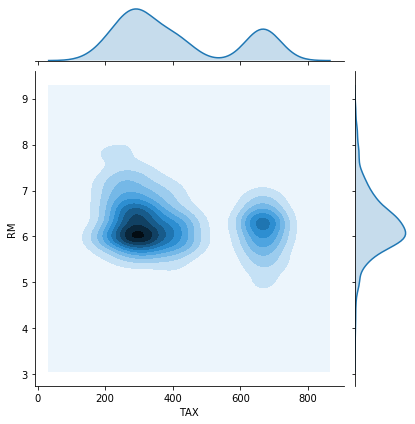

In [15]:
sns.jointplot(df['TAX'],df['RM'],kind = 'kde')

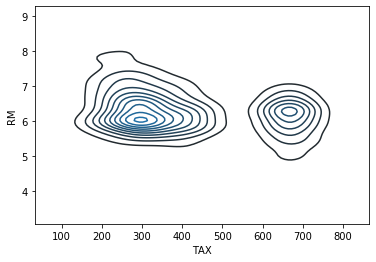

In [16]:
sns.kdeplot(df['TAX'],df['RM'])

What you'll see is you have access to so many visualizations.  A great way to explore them is through the gallery:  https://seaborn.pydata.org/examples/index.html


# How to implement Random Forest

First, we need to get a train and test dataset going...

In [17]:
from sklearn.model_selection import train_test_split
X = df

In [18]:
Y = data.target

In [19]:
X.shape

(506, 13)

In [20]:
Y.shape

(506,)

The 'ravel' command flattens an array:  "ravel(): when you have y.shape == (10, 1), using y.ravel().shape == (10, ). In words... it flattens an array."

https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [22]:
print(X_train.shape,Y_train.shape)

(379, 13) (379,)


In [23]:
reg = ske.RandomForestRegressor(n_estimators=1000,random_state = 0)

In [24]:
Y_train = np.ravel(Y_train)

In [25]:
reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [26]:
Y_pred = reg.predict(X_test)

How do we evaluate this model?  Previously, we've worked with labels for classifications but now instead of a DISCRETE target, we've got a continuous target.  For example, the confusion matrix doesn't make sense and the code will error out below:

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, Y_pred)

ValueError: continuous is not supported

Check out this [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html) and see if you can find some ways to evaluate this model.

In [28]:
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error,mean_squared_error,r2_score

In [29]:
explained_variance_score(Y_test,Y_pred)

0.8038932325577687

In [30]:
max_error(Y_test,Y_pred)

20.766500000000057

In [31]:
print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))
print(r2_score(Y_test, Y_pred, multioutput='variance_weighted'))

2.5419283464567104
16.427632250630026
0.7989249666895868


The importance of our features can be found in reg.feature_importances_. We sort them by decreasing order of importance:

In [32]:
reg.feature_importances_

array([0.03802909, 0.00096075, 0.00795783, 0.00118918, 0.0158759 ,
       0.39465879, 0.01264835, 0.04119215, 0.00404612, 0.01747215,
       0.02039368, 0.0102544 , 0.43532161])

In [33]:
feat_ind = np.argsort(reg.feature_importances_)[::-1]

In [34]:
feat_imp = reg.feature_importances_[np.argsort(reg.feature_importances_)][::-1]

In [35]:
data['feature_names'][feat_ind]

array(['LSTAT', 'RM', 'DIS', 'CRIM', 'PTRATIO', 'TAX', 'NOX', 'AGE', 'B',
       'INDUS', 'RAD', 'CHAS', 'ZN'], dtype='<U7')

Text(0.5, 1.0, 'Feature Importance')

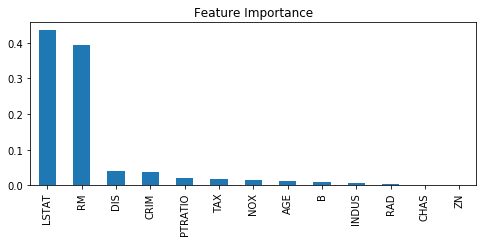

In [36]:
fig,ax=plt.subplots(1,1,figsize = (8,3))
labels = data['feature_names'][feat_ind]
pd.Series(feat_imp,index = labels).plot('bar',ax = ax)
ax.set_title('Feature Importance')

We can compute how much each feature contributes to decreasing the weighted impurity within a tree.   This is a fast calculation, but one should be cautious because it can be a biased approach.  It has a tendency to inflate the importance of continuous features or high-cardinality categorical variables (a lot of very uncommon or unique variables).

Text(0, 0.5, 'Value of House (1009 x $)')

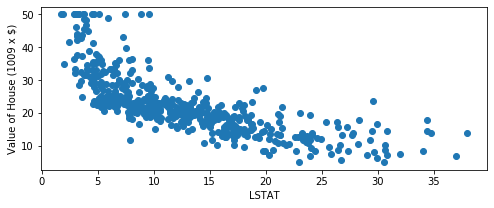

In [42]:
fig,ax=plt.subplots(1,1,figsize = (8,3))
ax.scatter(X['LSTAT'],Y)
ax.set_xlabel('LSTAT')
ax.set_ylabel('Value of House (1009 x $)')

In [38]:
from sklearn import tree


In [39]:
reg.estimators_[0]

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=209652396, splitter='best')

In [40]:
tree.export_graphviz(reg.estimators_[0], 'tree.dot')

In [41]:
tree.export_graphviz(reg.estimators_[5], 'tree.dot', feature_names = data['feature_names'], rounded = True, precision = 1)

You'll need to open tree.dot file in a text editor, e.g., notepad.  Select all the code and paste in here:  http://www.webgraphviz.com/.  Scroll right and the tree should show up.

## More practice - optional but recommended because its interesting and doesn't take too long

This is another good [tutorial](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0) on random forest:
.  You can perform this tutorial on your own and expand it for your choose your adventure, though you should be sure to demonstrate knowledge of this topic vs. copying and executing the tutorial.